# Human Activity Recognition

## Obtain the input files

In [15]:
# Imports
import os
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split

# Loading the data
raw_data = load_files(os.getcwd() + r'/Data', shuffle=False)
files = raw_data['filenames']
targets = raw_data['target']

train_files, test_files, train_targets, test_targets = train_test_split(files, targets, test_size=100, random_state=191)

valid_files = train_files[300:]
valid_targets = train_targets[300:]

train_files = train_files[:300]
train_targets = train_targets[:300]

# Generic details about the data
print('Total number of videos:', len(files))
print('\nNumber of videos in training data:', train_files.shape[0])
print('Number of videos in validation data:', valid_files.shape[0])
print('Number of videos in test data:', test_files.shape[0])

('Total number of videos:', 522)
('\nNumber of videos in training data:', 300)
('Number of videos in validation data:', 122)
('Number of videos in test data:', 100)


### Description of the class labels

In [16]:
print('The categorical labels are converted into integers.\nFollowing is the mapping - \n')
for label in zip(range(6), raw_data['target_names']):
    print(label)

The categorical labels are converted into integers.
Following is the mapping - 

(0, 'boxing')
(1, 'handclapping')
(2, 'handwaving')
(3, 'jogging')
(4, 'running')
(5, 'walking')


### Each video file is associated with its class label

In [17]:
# Displaying the first 5 videos (paths) in the training data along with their labels
# (path of video, class label)
for pair in zip(train_files[:5], train_targets[:5]):
    print(pair)

('/home/geet/Activity_Recognition_3D_CNN/Data/handwaving/person05_handwaving_d4_uncomp.avi', 2)
('/home/geet/Activity_Recognition_3D_CNN/Data/walking/person13_walking_d3_uncomp.avi', 5)
('/home/geet/Activity_Recognition_3D_CNN/Data/boxing/person09_boxing_d4_uncomp.avi', 0)
('/home/geet/Activity_Recognition_3D_CNN/Data/running/person11_running_d4_uncomp.avi', 4)
('/home/geet/Activity_Recognition_3D_CNN/Data/walking/person14_walking_d1_uncomp.avi', 5)


## Test Case for the Number of Classes and their mapping

In [18]:
no_of_classes =6;
test_result=True;
for i in train_targets:
    # THe mappings of targets are from 0-(number of classes -1)
    if i>no_of_classes-1:
        print "Test Failed: Mapping has exceeded the permissible mapping of the target in training Set"
        test_result=False;

for i in test_targets:
    # THe mappings of targets are from 0-(number of classes -1)
    if i>no_of_classes-1:
        print "Test Failed: Mapping has exceeded the permissible mapping of the target in testing Set"
        test_result=False;
        
for i in valid_targets:
    # THe mappings of targets are from 0-(number of classes -1)
    if i>no_of_classes-1:
        print "Test Failed: Mapping has exceeded the permissible mapping of the target in validation set"
        test_result=False;

if test_result== True:
    print "Test Successful"
else:
    print "Test Failed"
    
    


Test Successful


## Negative testcase

In [19]:
import copy

no_of_classes =6;
test_result=True;

#Manually Passing the irrelaent Category
valid_targets2=copy.copy(valid_targets);
train_targets2=copy.copy(train_targets);
test_targets2=copy.copy(test_targets);

valid_targets2[20]=8;


for i in train_targets:
    # THe mappings of targets are from 0-(number of classes -1)
    if i>no_of_classes-1:
        print "Test Failed: Mapping has exceeded the permissible mapping of the target in training Set"
        test_result=False;

for i in test_targets:
    # THe mappings of targets are from 0-(number of classes -1)
    if i>no_of_classes-1:
        print "Test Failed: Mapping has exceeded the permissible mapping of the target in testing Set"
        test_result=False;
        
for i in valid_targets2:
    # THe mappings of targets are from 0-(number of classes -1)
    if i>no_of_classes-1:
        print "Test Failed: Mapping has exceeded the permissible mapping of the target in validation set"
        test_result=False;

if test_result== True:
    print "Test Successful"
else:
    print "Test Failed"

Test Failed: Mapping has exceeded the permissible mapping of the target in validation set
Test Failed


('\nShape of the sample data:', (432, 120, 160, 3))


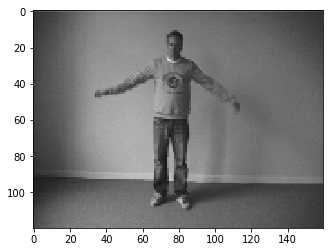

In [20]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import skvideo.io
%matplotlib inline


# The path of a sample video in the training data
sample_files = train_files[:1]

# An object of the class 'Videos'
sample = skvideo.io.vread(sample_files[0]);

print('\nShape of the sample data:', sample.shape)

# Displaying a frame from the sample video
plt.imshow(sample[300])

In [21]:
sec=7
frames_needed=35

In [22]:
import numpy as np
from skvideo.io import FFmpegReader, ffprobe
from skvideo.utils import rgb2gray
from PIL import Image
from keras.preprocessing import image
from tqdm import tqdm
from keras.utils import to_categorical
import cv2
def read_video_bgsub(path,size):


        cap = FFmpegReader(filename=path)
        list_of_frames = []
        fps = int(cap.inputfps)                  # Frame Rate
        
        
        frames_from_sec=int(frames_needed/sec)
        
        frame_alternate=int(fps/frames_from_sec)
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
        fgbg = cv2.createBackgroundSubtractorMOG2()
        count = 0;
        
        for index, frame in enumerate(cap.nextFrame()):
            temp_image = image.array_to_img(frame)
            #print type(temp_image)
            fgmask = fgbg.apply(frame)
            fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
            
            fgmaskimg = Image.fromarray(fgmask)
            
            #print type(fgmask)
            frame = image.img_to_array(
                        fgmaskimg.resize(
                            (size, size),
                            Image.ANTIALIAS)).astype('uint8')
            if index%frame_alternate == 0:
                if count < frames_needed:
                    list_of_frames.append(frame);
                    count= count+1;

        temp_video = np.stack(list_of_frames)
        
        ##Extract Specific Frames
        
        total_frames = temp_video.shape[0]
        
        
        
        cap.close()

        temp_video = rgb2gray(temp_video)
                
        return np.expand_dims(temp_video, axis=0)

In [23]:
import numpy as np
from skvideo.io import FFmpegReader, ffprobe
from skvideo.utils import rgb2gray
from PIL import Image
from keras.preprocessing import image
from tqdm import tqdm
from keras.utils import to_categorical
def read_video(path):


        cap = FFmpegReader(filename=path)
        list_of_frames = []
        fps = int(cap.inputfps)                  # Frame Rate
        
        frames_from_sec=int(frames_needed/sec)
        
        frame_alternate=int(fps/frames_from_sec)
        count = 0;
        
        for index, frame in enumerate(cap.nextFrame()):
            temp_image = image.array_to_img(frame)
            frame = image.img_to_array(
                        temp_image.resize(
                            (20, 20),
                            Image.ANTIALIAS)).astype('uint8')
            if index%frame_alternate == 0:
                if count < frames_needed:
                    list_of_frames.append(frame);
                    count= count+1;

        temp_video = np.stack(list_of_frames)
        
        ##Extract Specific Frames
        
        total_frames = temp_video.shape[0]
        
        
        
        cap.close()

        temp_video = rgb2gray(temp_video)
                
        return np.expand_dims(temp_video, axis=0)

In [24]:
def read_videos(paths):
 
        list_of_videos = []
        list_of_videos = [
            read_video(path) for path in tqdm(paths)
        ]

        #print("shape1:", list_of_videos[:].shape)
        videos = np.vstack(list_of_videos)

        #base = self.normalize_pixels[0]
        #r = self.normalize_pixels[1] - base
        min_ = np.min(videos, axis=(1, 2, 3), keepdims=True)
        max_ = np.max(videos, axis=(1, 2, 3), keepdims=True)
        #return ((videos.astype('float32') - min_) / (max_ - min_)) * r + base
        return ((videos.astype('float32') - min_) / (max_ - min_))


In [25]:
def read_videos_bgsub(paths, size):
     
        list_of_videos = []
        list_of_videos = [
            read_video_bgsub(path, size) for path in tqdm(paths)
        ]

        #print("shape1:", list_of_videos[:].shape)
        videos = np.vstack(list_of_videos)

        #base = self.normalize_pixels[0]
        #r = self.normalize_pixels[1] - base
        min_ = np.min(videos, axis=(1, 2, 3), keepdims=True)
        max_ = np.max(videos, axis=(1, 2, 3), keepdims=True)
        #return ((videos.astype('float32') - min_) / (max_ - min_)) * r + base
        return ((videos.astype('float32') - min_) / (max_ - min_))

In [26]:
# Reading training videos and one-hot encoding the training labels
X_train = read_videos(train_files)
y_train = to_categorical(train_targets, num_classes=6)
print('Shape of training data:', X_train.shape)
print('Shape of training labels:', y_train.shape)


 52%|█████▏    | 155/300 [01:07<00:49,  2.92it/s]


100%|██████████| 300/300 [02:10<00:00,  2.31it/s]


('Shape of training data:', (300, 35, 20, 20, 1))
('Shape of training labels:', (300, 6))


In [27]:
# Reading validation videos and one-hot encoding the validation labels
X_valid = read_videos(valid_files)

y_valid = to_categorical(valid_targets, num_classes=6)
print('Shape of validation data:', X_valid.shape)
print('Shape of validation labels:', y_valid.shape)


100%|██████████| 122/122 [00:55<00:00,  2.45it/s]


('Shape of validation data:', (122, 35, 20, 20, 1))
('Shape of validation labels:', (122, 6))


In [28]:
# Reading testing videos and one-hot encoding the testing labels
X_test = read_videos(test_files)
y_test = to_categorical(test_targets, num_classes=6)
print('Shape of testing data:', X_test.shape)
print('Shape of testing labels:', y_test.shape)


100%|██████████| 100/100 [00:41<00:00,  2.56it/s]


('Shape of testing data:', (100, 35, 20, 20, 1))
('Shape of testing labels:', (100, 6))


In [29]:
X_train_bgsub = read_videos_bgsub(train_files,20)
y_train_bgsub = to_categorical(train_targets, num_classes=6)
print('Shape of training data:', X_train_bgsub.shape)
print('Shape of training labels:', y_train_bgsub.shape)


 52%|█████▏    | 155/300 [02:05<01:32,  1.56it/s]


100%|██████████| 300/300 [04:02<00:00,  1.02s/it]


('Shape of training data:', (300, 35, 20, 20, 1))
('Shape of training labels:', (300, 6))


In [30]:
X_test_bgsub = read_videos_bgsub(test_files,20)
y_test_bgsub = to_categorical(test_targets, num_classes=6)
print('Shape of testing data:', X_test_bgsub.shape)
print('Shape of testing labels:', y_test_bgsub.shape)


100%|██████████| 100/100 [01:18<00:00,  1.29it/s]


('Shape of testing data:', (100, 35, 20, 20, 1))
('Shape of testing labels:', (100, 6))


In [31]:
X_valid_bgsub = read_videos_bgsub(valid_files,20)
y_valid_bgsub = to_categorical(valid_targets, num_classes=6)
print('Shape of validation data:', X_valid_bgsub.shape)
print('Shape of validation labels:', y_valid_bgsub.shape)


100%|██████████| 122/122 [01:31<00:00,  1.46it/s]


('Shape of validation data:', (122, 35, 20, 20, 1))
('Shape of validation labels:', (122, 6))


## <font color='red'>Testcase to ensure that the number of data is same after processing<font color='red'>

In [33]:
#print X_valid.shape[0]

test_result= True;

if X_train.shape[0]!=train_files.shape[0]:
    test_result= False;
    print "Test failure: training data doesn't match with its input size"
    
if X_test.shape[0]!=test_files.shape[0]:
    test_result= False;
    print "Test failure: testing data doesn't match with its input size"

if X_valid.shape[0]!=valid_files.shape[0]:
    test_result= False;
    print "Test failure: validation data doesn't match with its input size"
    
if X_train_bgsub.shape[0]!=train_files.shape[0]:
    test_result= False;
    print "Test failure: training data doesn't match with its input size"
    
if X_test_bgsub.shape[0]!=test_files.shape[0]:
    test_result= False;
    print "Test failure: testing data doesn't match with its input size"

if X_valid_bgsub.shape[0]!=valid_files.shape[0]:
    test_result= False;
    print "Test failure: validation data doesn't match with its input size"
    
if test_result == True:
    print "Test Passed"
else:
    print "Test Failed"

Test Passed


## <font color='red'>Testcase to ensure that the number of data is same after processing<font color='red'>
### <font color='red'>Negative testcase by insering a redundant video<font color='red'>

In [34]:
import copy

X_train2=copy.copy(X_train);
X_test2=copy.copy(X_test);
X_valid2=copy.copy(X_valid);

X_train_bgsub2=copy.copy(X_train_bgsub);
X_test_bgsub2=copy.copy(X_test_bgsub);
X_valid_bgsub2=copy.copy(X_valid_bgsub);

#print X_valid.shape[0]

test_result= True;

temp=np.expand_dims(X_train2[20],axis=0)

#print temp.shape


X_train2=np.vstack([X_train2,temp])

print X_train2.shape[0]

if X_train2.shape[0]!=train_files.shape[0]:
    test_result= False;
    print "Test failure: training data doesn't match with its input size"
    
if X_test2.shape[0]!=test_files.shape[0]:
    test_result= False;
    print "Test failure: testing data doesn't match with its input size"

if X_valid2.shape[0]!=valid_files.shape[0]:
    test_result= False;
    print "Test failure: validation data doesn't match with its input size"
    
if X_train_bgsub2.shape[0]!=train_files.shape[0]:
    test_result= False;
    print "Test failure: training data doesn't match with its input size"
    
if X_test_bgsub2.shape[0]!=test_files.shape[0]:
    test_result= False;
    print "Test failure: testing data doesn't match with its input size"

if X_valid_bgsub2.shape[0]!=valid_files.shape[0]:
    test_result= False;
    print "Test failure: validation data doesn't match with its input size"
    
if test_result == True:
    print "Test Passed"
else:
    print "Test Failed"

301
Test failure: training data doesn't match with its input size
Test Failed


('Class of 1st video:', 2)


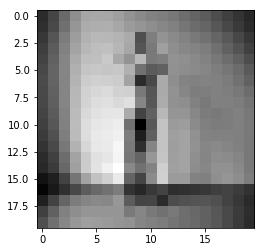

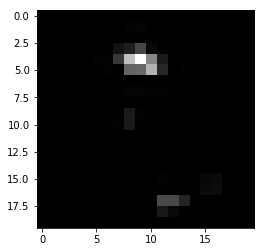

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

# After pre-processing

# Displaying the 10th frame of the first processed video from the training data
print("Class of 1st video:",y_train[0].argmax());
plt.imshow(np.squeeze(X_train[0][10], axis=2), cmap='gray')
plt.show()
plt.imshow(np.squeeze(X_train_bgsub[0][10], axis=2), cmap='gray')

# Model 1 without BG Subtraction

In [36]:
# Imports
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D
from keras.layers.core import Dense

# Using the Sequential Model
model1 = Sequential()

# Adding Alternate convolutional and pooling layers
model1.add(Conv3D(filters=16, kernel_size=(10, 3, 3), strides=(3, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model1.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model1.add(Conv3D(filters=64, kernel_size=(5, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model1.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))


model1.add(GlobalAveragePooling3D())

model1.add(Dense(32, activation='relu'))

model1.add(Dense(6, activation='softmax'))

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 12, 20, 20, 16)    1456      
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 12, 10, 10, 16)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 12, 10, 10, 64)    46144     
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 12, 5, 5, 64)      0         
_________________________________________________________________
global_average_pooling3d_1 ( (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total para

### Training Model - 1

In [37]:
# Imports
from keras.callbacks import ModelCheckpoint

# Compiling the model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint1 = ModelCheckpoint(filepath='Model_1.weights.best.hdf5', save_best_only=True, verbose=1)


history1 = model1.fit(X_train, y_train, batch_size=15, epochs=60, validation_data=(X_valid, y_valid), verbose=2, callbacks=[checkpoint1])
#history = model.fit(X_train, y_train, batch_size=16, epochs=40, verbose=2, callbacks=[checkpoint])

Train on 300 samples, validate on 122 samples
Epoch 1/60
 - 9s - loss: 1.7944 - acc: 0.1967 - val_loss: 1.7915 - val_acc: 0.2131

Epoch 00001: val_loss improved from inf to 1.79151, saving model to Model_1.weights.best.hdf5
Epoch 2/60
 - 5s - loss: 1.7824 - acc: 0.1733 - val_loss: 1.7891 - val_acc: 0.1475

Epoch 00002: val_loss improved from 1.79151 to 1.78914, saving model to Model_1.weights.best.hdf5
Epoch 3/60
 - 6s - loss: 1.7709 - acc: 0.2133 - val_loss: 1.7899 - val_acc: 0.1475

Epoch 00003: val_loss did not improve from 1.78914
Epoch 4/60
 - 6s - loss: 1.7670 - acc: 0.2033 - val_loss: 1.7784 - val_acc: 0.2213

Epoch 00004: val_loss improved from 1.78914 to 1.77843, saving model to Model_1.weights.best.hdf5
Epoch 5/60
 - 6s - loss: 1.7600 - acc: 0.2000 - val_loss: 1.7812 - val_acc: 0.1475

Epoch 00005: val_loss did not improve from 1.77843
Epoch 6/60
 - 6s - loss: 1.7745 - acc: 0.2067 - val_loss: 1.7719 - val_acc: 0.2213

Epoch 00006: val_loss improved from 1.77843 to 1.77194, sa


Epoch 00053: val_loss did not improve from 1.07667
Epoch 54/60
 - 5s - loss: 1.0276 - acc: 0.4567 - val_loss: 1.1623 - val_acc: 0.3525

Epoch 00054: val_loss did not improve from 1.07667
Epoch 55/60
 - 5s - loss: 1.0415 - acc: 0.4000 - val_loss: 1.0887 - val_acc: 0.3770

Epoch 00055: val_loss did not improve from 1.07667
Epoch 56/60
 - 5s - loss: 1.0329 - acc: 0.4833 - val_loss: 1.0974 - val_acc: 0.3525

Epoch 00056: val_loss did not improve from 1.07667
Epoch 57/60
 - 5s - loss: 1.0591 - acc: 0.3833 - val_loss: 1.0667 - val_acc: 0.4098

Epoch 00057: val_loss improved from 1.07667 to 1.06668, saving model to Model_1.weights.best.hdf5
Epoch 58/60
 - 6s - loss: 1.0650 - acc: 0.4300 - val_loss: 1.0990 - val_acc: 0.3852

Epoch 00058: val_loss did not improve from 1.06668
Epoch 59/60
 - 6s - loss: 1.0184 - acc: 0.4500 - val_loss: 1.0627 - val_acc: 0.4754

Epoch 00059: val_loss improved from 1.06668 to 1.06270, saving model to Model_1.weights.best.hdf5
Epoch 60/60
 - 6s - loss: 1.0071 - acc

### Evaluating Model - 1

In [38]:
# Loading the model that performed the best on the validation set
model1.load_weights('Model_1.weights.best.hdf5')

# Testing the model on the Test data
(loss1, accuracy1) = model1.evaluate(X_test, y_test, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy1 * 100))

Accuracy on test data: 31.00%


## Model - 1 Performance



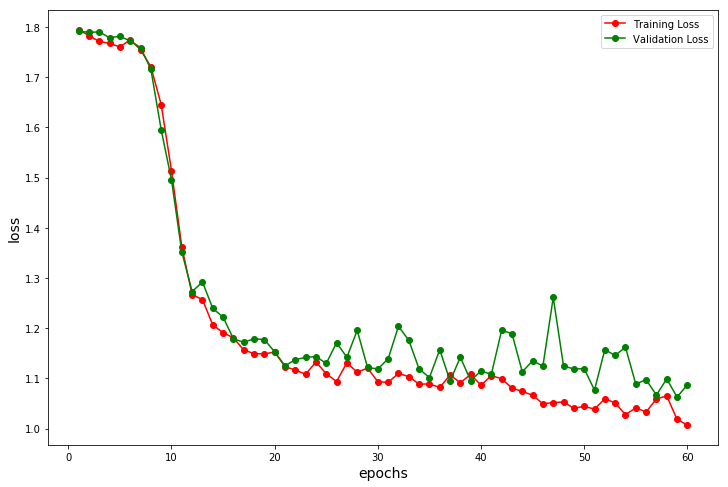

In [39]:
# Making the plot larger
plt.figure(figsize=(12, 8))

loss1 = history1.history['loss']                          # Loss on the training data
val_loss1 = history1.history['val_loss']                  # Loss on the validation data
epochs = range(1,61)

plt.plot(epochs, loss1, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss1, 'go-', label = 'Validation Loss')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

In [40]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.GnBu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.subplots(1, 1, figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
#cnf_matrix = confusion_matrix(y_test, y_pred)
#np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names,
#                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')

#plt.show()


Normalized confusion matrix


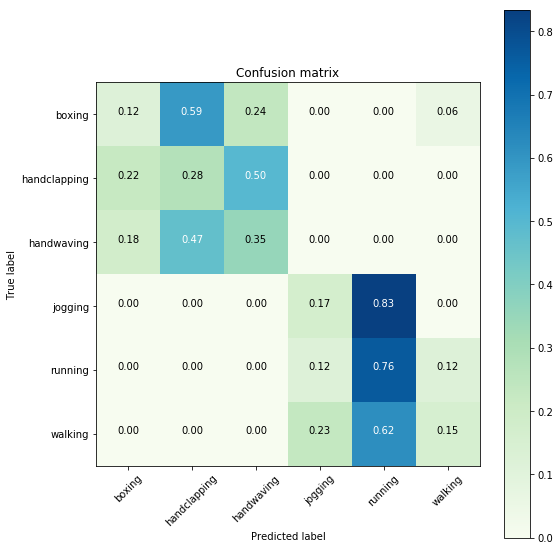

In [41]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions = model1.predict_classes(X_test);
y_pred=to_categorical(y_predictions, num_classes=6).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);
#print y_predictions[:10]
#print y_test[:10]
model_cnf_matrix = confusion_matrix(y_test_cm,y_pred);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix, 
                                              classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'], 
                                              normalize=True)


## Test Case to ensure that predicted values are within the available class

In [42]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions = model1.predict_classes(X_test);
y_pred=to_categorical(y_predictions, num_classes=6).argmax(axis=1);

#print y_predictions[:10]

no_of_classes =6;
test_result=True;
for i in y_predictions:
    # THe mappings of targets are from 0-(number of classes -1)
    if i>no_of_classes-1:
        print "Test Failed: Mapping has exceeded the permissible mapping of the prediction values"
        test_result=False;

if test_result== True:
    print "Test Successful"
else:
    print "Test Failed"


Test Successful


## Negative Test

In [43]:
from sklearn.metrics import confusion_matrix
import itertools
import copy
y_predictions = model1.predict_classes(X_test);
y_pred=to_categorical(y_predictions, num_classes=6).argmax(axis=1);

#print y_predictions[:10]

y_predictions2=copy.copy(y_predictions)
y_predictions2[-1]=8

no_of_classes =6;
test_result=True;
for i in y_predictions2:
    # THe mappings of targets are from 0-(number of classes -1)
    if i>no_of_classes-1:
        print "Test Failed: Mapping has exceeded the permissible mapping of the prediction values"
        test_result=False;

if test_result== True:
    print "Test Successful"
else:
    print "Test Failed"


Test Failed: Mapping has exceeded the permissible mapping of the prediction values
Test Failed


# Model 1, With BG Subtraction

In [44]:
# Imports
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D
from keras.layers.core import Dense

# Using the Sequential Model
model1_bg = Sequential()

# Adding Alternate convolutional and pooling layers
model1_bg.add(Conv3D(filters=16, kernel_size=(10, 3, 3), strides=(3, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model1_bg.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model1_bg.add(Conv3D(filters=64, kernel_size=(5, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model1_bg.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))


model1_bg.add(GlobalAveragePooling3D())

model1_bg.add(Dense(32, activation='relu'))

model1_bg.add(Dense(6, activation='softmax'))

model1_bg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_3 (Conv3D)            (None, 12, 20, 20, 16)    1456      
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 12, 10, 10, 16)    0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 12, 10, 10, 64)    46144     
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 12, 5, 5, 64)      0         
_________________________________________________________________
global_average_pooling3d_2 ( (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 198       
Total para

In [45]:
from keras.utils import plot_model
import pydot
plot_model(model1_bg, to_file='model.png',show_shapes=True)


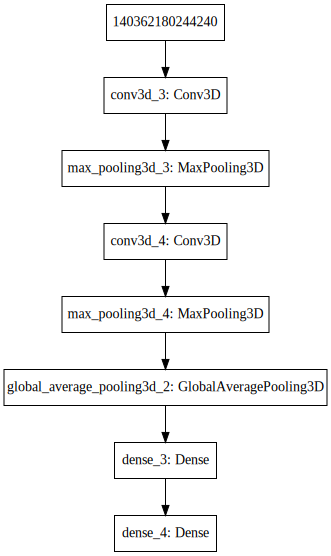

In [46]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model1_bg).create(prog='dot', format='svg'))



In [47]:
# Imports
from keras.callbacks import ModelCheckpoint

# Compiling the model
model1_bg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint_bg = ModelCheckpoint(filepath='Model_1_bg.weights.best.hdf5', save_best_only=True, verbose=1)


history1_bg = model1_bg.fit(X_train_bgsub, y_train_bgsub, batch_size=15, epochs=60, validation_data=(X_valid_bgsub, y_valid_bgsub), verbose=1, callbacks=[checkpoint_bg])
#history = model.fit(X_train, y_train, batch_size=16, epochs=40, verbose=2, callbacks=[checkpoint])

Train on 300 samples, validate on 122 samples
Epoch 1/60
300/300 [==============================] - 7s 22ms/step - loss: 1.7621 - acc: 0.2000 - val_loss: 1.6969 - val_acc: 0.2213

Epoch 00001: val_loss improved from inf to 1.69692, saving model to Model_1_bg.weights.best.hdf5
Epoch 2/60
300/300 [==============================] - 6s 20ms/step - loss: 1.6707 - acc: 0.2067 - val_loss: 1.6483 - val_acc: 0.1885

Epoch 00002: val_loss improved from 1.69692 to 1.64828, saving model to Model_1_bg.weights.best.hdf5
Epoch 3/60
300/300 [==============================] - 6s 19ms/step - loss: 1.5933 - acc: 0.2767 - val_loss: 1.5211 - val_acc: 0.3607

Epoch 00003: val_loss improved from 1.64828 to 1.52106, saving model to Model_1_bg.weights.best.hdf5
Epoch 4/60
300/300 [==============================] - 6s 19ms/step - loss: 1.4713 - acc: 0.3867 - val_loss: 1.4610 - val_acc: 0.2787

Epoch 00004: val_loss improved from 1.52106 to 1.46097, saving model to Model_1_bg.weights.best.hdf5
Epoch 5/60
300/300

300/300 [==============================] - 9s 29ms/step - loss: 0.4106 - acc: 0.8367 - val_loss: 0.7487 - val_acc: 0.7213

Epoch 00041: val_loss did not improve from 0.54906
Epoch 42/60
300/300 [==============================] - 9s 29ms/step - loss: 0.3528 - acc: 0.8667 - val_loss: 0.6201 - val_acc: 0.7787

Epoch 00042: val_loss did not improve from 0.54906
Epoch 43/60
300/300 [==============================] - 9s 29ms/step - loss: 0.3130 - acc: 0.8633 - val_loss: 0.7078 - val_acc: 0.7459

Epoch 00043: val_loss did not improve from 0.54906
Epoch 44/60
300/300 [==============================] - 9s 29ms/step - loss: 0.3359 - acc: 0.8467 - val_loss: 0.9547 - val_acc: 0.6885

Epoch 00044: val_loss did not improve from 0.54906
Epoch 45/60
300/300 [==============================] - 9s 31ms/step - loss: 0.3268 - acc: 0.8633 - val_loss: 0.5966 - val_acc: 0.7951

Epoch 00045: val_loss did not improve from 0.54906
Epoch 46/60
300/300 [==============================] - 9s 31ms/step - loss: 0.2926

In [48]:
model1_bg.load_weights('Model_1_bg.weights.best.hdf5')

# Testing the model on the Test data
(loss1_bg, accuracy1_bg) = model1_bg.evaluate(X_test_bgsub, y_test_bgsub, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy1_bg * 100))

Accuracy on test data: 78.00%


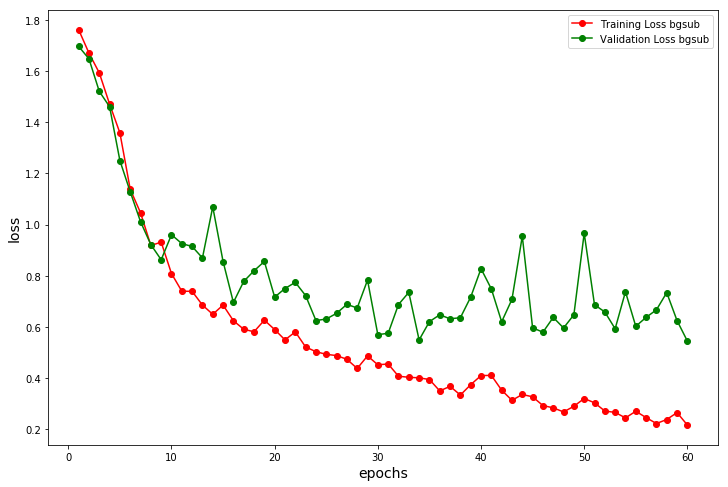

In [49]:
plt.figure(figsize=(12, 8))

loss1_bg = history1_bg.history['loss']                          # Loss on the training data
val_loss1_bg = history1_bg.history['val_loss']                  # Loss on the validation data
epochs = range(1,61)

plt.plot(epochs, loss1_bg, 'ro-', label='Training Loss bgsub')
plt.plot(epochs, val_loss1_bg, 'go-', label = 'Validation Loss bgsub')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

Normalized confusion matrix


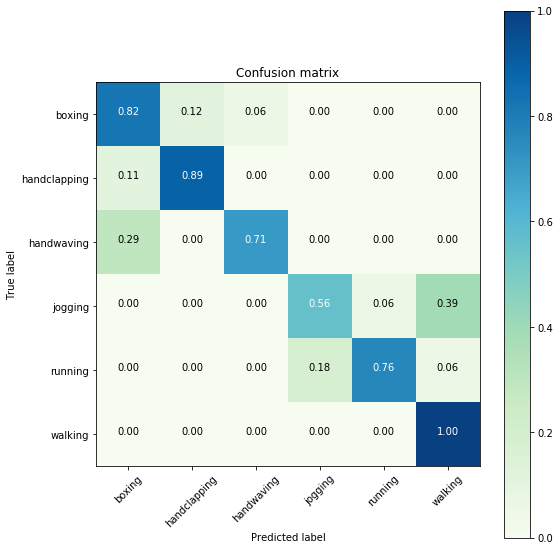

In [50]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions = model1_bg.predict_classes(X_test_bgsub);
y_pred=to_categorical(y_predictions, num_classes=6).argmax(axis=1);
y_test_cm = y_test_bgsub.argmax(axis=1);
#print y_predictions[:10]
#print y_test[:10]
model_cnf_matrix = confusion_matrix(y_test_cm,y_pred);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix, 
                                              classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'], 
                                              normalize=True)


## Comparision of Model1 with BG-sub and without BG-sub

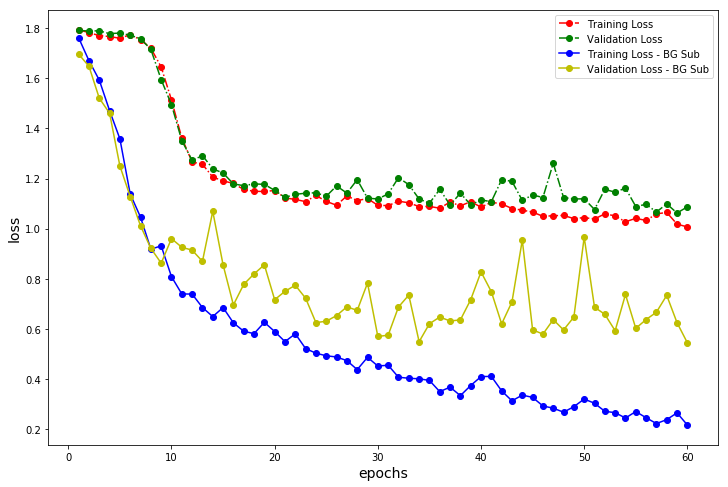

In [51]:
plt.figure(figsize=(12, 8))
plt.plot(epochs, loss1, 'ro-.', label='Training Loss')
plt.plot(epochs, val_loss1, 'go-.', label = 'Validation Loss')
plt.plot(epochs, loss1_bg, 'bo-', label='Training Loss - BG Sub')
plt.plot(epochs, val_loss1_bg, 'yo-', label = 'Validation Loss - BG Sub')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

## Model - 2


In [52]:
# Imports
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D
from keras.layers.core import Dense, Dropout

# Using the Sequential Model
model2 = Sequential()


model2.add(Conv3D(filters=16, kernel_size=(10, 3, 3), strides=(5, 2, 2), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model2.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model2.add(Conv3D(filters=64, kernel_size=(5, 3, 3), strides=(3, 1, 1), padding='same', activation='relu'))
model2.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model2.add(Conv3D(filters=256, kernel_size=(3, 3, 3), strides=(3, 1, 1), padding='same', activation='relu'))
model2.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))


model2.add(GlobalAveragePooling3D())

model2.add(Dense(32, activation='relu'))

#model2.add(Dropout(0.5))

model2.add(Dense(6, activation='softmax'))

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_5 (Conv3D)            (None, 7, 10, 10, 16)     1456      
_________________________________________________________________
max_pooling3d_5 (MaxPooling3 (None, 7, 5, 5, 16)       0         
_________________________________________________________________
conv3d_6 (Conv3D)            (None, 3, 5, 5, 64)       46144     
_________________________________________________________________
max_pooling3d_6 (MaxPooling3 (None, 3, 3, 3, 64)       0         
_________________________________________________________________
conv3d_7 (Conv3D)            (None, 1, 3, 3, 256)      442624    
_________________________________________________________________
max_pooling3d_7 (MaxPooling3 (None, 1, 2, 2, 256)      0         
_________________________________________________________________
global_average_pooling3d_3 ( (None, 256)               0         
__________

### Training Model - 2


In [53]:
# Imports
from keras.callbacks import ModelCheckpoint
from keras import optimizers

# Compiling the model
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#adam=optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
#model2.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

#model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
# Saving the model that performed the best on the validation set
checkpoint2 = ModelCheckpoint(filepath='Model_2.weights.best.hdf5', save_best_only=True, verbose=1)

history2 = model2.fit(X_train, y_train, batch_size=15, epochs=60, 
                    validation_data=(X_valid, y_valid), verbose=2, callbacks=[checkpoint2])

Train on 300 samples, validate on 122 samples
Epoch 1/60
 - 2s - loss: 1.7908 - acc: 0.1867 - val_loss: 1.7788 - val_acc: 0.1475

Epoch 00001: val_loss improved from inf to 1.77882, saving model to Model_2.weights.best.hdf5
Epoch 2/60
 - 1s - loss: 1.7735 - acc: 0.2133 - val_loss: 1.7785 - val_acc: 0.1475

Epoch 00002: val_loss improved from 1.77882 to 1.77850, saving model to Model_2.weights.best.hdf5
Epoch 3/60
 - 1s - loss: 1.7359 - acc: 0.2133 - val_loss: 1.7053 - val_acc: 0.1475

Epoch 00003: val_loss improved from 1.77850 to 1.70533, saving model to Model_2.weights.best.hdf5
Epoch 4/60
 - 1s - loss: 1.5504 - acc: 0.2467 - val_loss: 1.4345 - val_acc: 0.2705

Epoch 00004: val_loss improved from 1.70533 to 1.43446, saving model to Model_2.weights.best.hdf5
Epoch 5/60
 - 1s - loss: 1.3299 - acc: 0.2767 - val_loss: 1.2550 - val_acc: 0.3770

Epoch 00005: val_loss improved from 1.43446 to 1.25498, saving model to Model_2.weights.best.hdf5
Epoch 6/60
 - 1s - loss: 1.1860 - acc: 0.3500 - 

 - 1s - loss: 0.4026 - acc: 0.8500 - val_loss: 1.1093 - val_acc: 0.5902

Epoch 00054: val_loss did not improve from 0.80632
Epoch 55/60
 - 1s - loss: 0.4260 - acc: 0.8033 - val_loss: 1.0547 - val_acc: 0.5328

Epoch 00055: val_loss did not improve from 0.80632
Epoch 56/60
 - 1s - loss: 0.3893 - acc: 0.8367 - val_loss: 0.9675 - val_acc: 0.5656

Epoch 00056: val_loss did not improve from 0.80632
Epoch 57/60
 - 1s - loss: 0.3697 - acc: 0.8433 - val_loss: 0.9481 - val_acc: 0.6148

Epoch 00057: val_loss did not improve from 0.80632
Epoch 58/60
 - 1s - loss: 0.3194 - acc: 0.8700 - val_loss: 1.0071 - val_acc: 0.6803

Epoch 00058: val_loss did not improve from 0.80632
Epoch 59/60
 - 1s - loss: 0.3709 - acc: 0.8233 - val_loss: 1.1925 - val_acc: 0.5492

Epoch 00059: val_loss did not improve from 0.80632
Epoch 60/60
 - 1s - loss: 0.3055 - acc: 0.8733 - val_loss: 1.0535 - val_acc: 0.5738

Epoch 00060: val_loss did not improve from 0.80632


### Evaluating Model - 2

Evaluating `Model-2` on the test data.

In [54]:
# Loading the model that performed the best on the validation set
model2.load_weights('Model_2.weights.best.hdf5')

# Testing the model on the Test data
(loss2, accuracy2) = model2.evaluate(X_test, y_test, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy2 * 100))

Accuracy on test data: 53.00%


## Model - 2 Performance



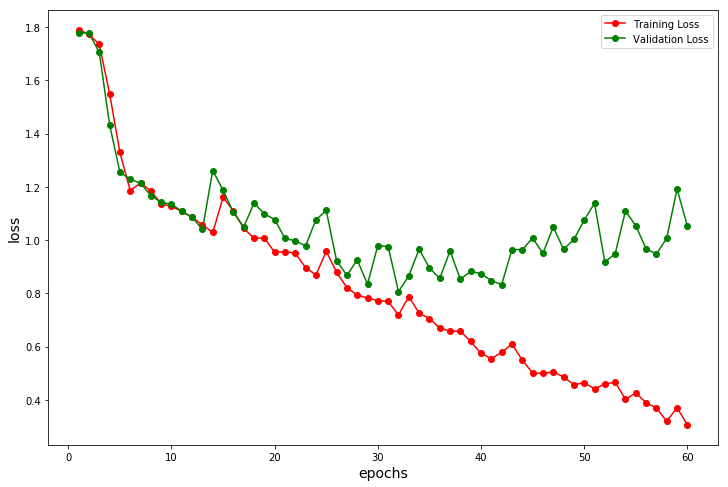

In [55]:
# Making the plot larger
plt.figure(figsize=(12, 8))

loss2 = history2.history['loss']                          # Loss on the training data
val_loss2 = history2.history['val_loss']                  # Loss on the validation data
epochs = range(1, 61)

plt.plot(epochs, loss2, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss2, 'go-', label = 'Validation Loss')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

Normalized confusion matrix


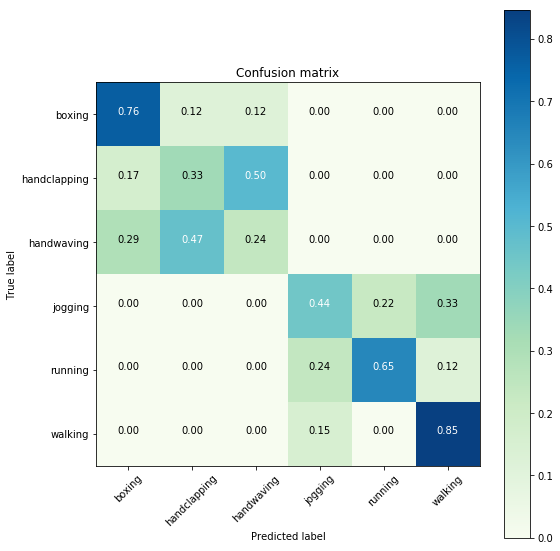

In [56]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions2 = model2.predict_classes(X_test);
y_pred2=to_categorical(y_predictions2, num_classes=6).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);
#print y_predictions[:10]
#print y_test[:10]
model_cnf_matrix = confusion_matrix(y_test_cm,y_pred2);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix, 
                                              classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'], 
                                              normalize=True)


# Model 2 - With BG

In [57]:
# Imports
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D
from keras.layers.core import Dense, Dropout

# Using the Sequential Model
model2_bg = Sequential()


model2_bg.add(Conv3D(filters=16, kernel_size=(10, 3, 3), strides=(5, 2, 2), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model2_bg.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model2_bg.add(Conv3D(filters=64, kernel_size=(5, 3, 3), strides=(3, 1, 1), padding='same', activation='relu'))
model2_bg.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model2_bg.add(Conv3D(filters=256, kernel_size=(3, 3, 3), strides=(3, 1, 1), padding='same', activation='relu'))
model2_bg.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))


model2_bg.add(GlobalAveragePooling3D())

model2_bg.add(Dense(32, activation='relu'))

#model2.add(Dropout(0.5))

model2_bg.add(Dense(6, activation='softmax'))

model2_bg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_8 (Conv3D)            (None, 7, 10, 10, 16)     1456      
_________________________________________________________________
max_pooling3d_8 (MaxPooling3 (None, 7, 5, 5, 16)       0         
_________________________________________________________________
conv3d_9 (Conv3D)            (None, 3, 5, 5, 64)       46144     
_________________________________________________________________
max_pooling3d_9 (MaxPooling3 (None, 3, 3, 3, 64)       0         
_________________________________________________________________
conv3d_10 (Conv3D)           (None, 1, 3, 3, 256)      442624    
_________________________________________________________________
max_pooling3d_10 (MaxPooling (None, 1, 2, 2, 256)      0         
_________________________________________________________________
global_average_pooling3d_4 ( (None, 256)               0         
__________

In [58]:
# Imports
from keras.callbacks import ModelCheckpoint
from keras import optimizers

# Compiling the model
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#adam=optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
#model2.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

#model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2_bg.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
# Saving the model that performed the best on the validation set
checkpoint2_bg = ModelCheckpoint(filepath='Model_2_bg.weights.best.hdf5', save_best_only=True, verbose=1)


history2_bg = model2_bg.fit(X_train_bgsub, y_train_bgsub, batch_size=15, epochs=60, 
                    validation_data=(X_valid_bgsub, y_valid_bgsub), verbose=2, callbacks=[checkpoint2_bg])

Train on 300 samples, validate on 122 samples
Epoch 1/60
 - 2s - loss: 1.6761 - acc: 0.2333 - val_loss: 1.5203 - val_acc: 0.3689

Epoch 00001: val_loss improved from inf to 1.52026, saving model to Model_2_bg.weights.best.hdf5
Epoch 2/60
 - 1s - loss: 1.4469 - acc: 0.3200 - val_loss: 1.2922 - val_acc: 0.4180

Epoch 00002: val_loss improved from 1.52026 to 1.29221, saving model to Model_2_bg.weights.best.hdf5
Epoch 3/60
 - 1s - loss: 1.2090 - acc: 0.4800 - val_loss: 1.0719 - val_acc: 0.5328

Epoch 00003: val_loss improved from 1.29221 to 1.07186, saving model to Model_2_bg.weights.best.hdf5
Epoch 4/60
 - 1s - loss: 1.0286 - acc: 0.5200 - val_loss: 0.9527 - val_acc: 0.5410

Epoch 00004: val_loss improved from 1.07186 to 0.95269, saving model to Model_2_bg.weights.best.hdf5
Epoch 5/60
 - 1s - loss: 0.8716 - acc: 0.6167 - val_loss: 1.0567 - val_acc: 0.6311

Epoch 00005: val_loss did not improve from 0.95269
Epoch 6/60
 - 1s - loss: 0.7626 - acc: 0.6800 - val_loss: 0.9010 - val_acc: 0.6721


 - 1s - loss: 0.0010 - acc: 1.0000 - val_loss: 1.3241 - val_acc: 0.7541

Epoch 00058: val_loss did not improve from 0.68929
Epoch 59/60
 - 1s - loss: 9.5138e-04 - acc: 1.0000 - val_loss: 1.3369 - val_acc: 0.7541

Epoch 00059: val_loss did not improve from 0.68929
Epoch 60/60
 - 1s - loss: 8.9548e-04 - acc: 1.0000 - val_loss: 1.3359 - val_acc: 0.7541

Epoch 00060: val_loss did not improve from 0.68929


In [59]:
# Loading the model that performed the best on the validation set
model2_bg.load_weights('Model_2_bg.weights.best.hdf5')

# Testing the model on the Test data
(loss2_bg, accuracy2_bg) = model2_bg.evaluate(X_test_bgsub, y_test_bgsub, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy2_bg * 100))

Accuracy on test data: 69.00%


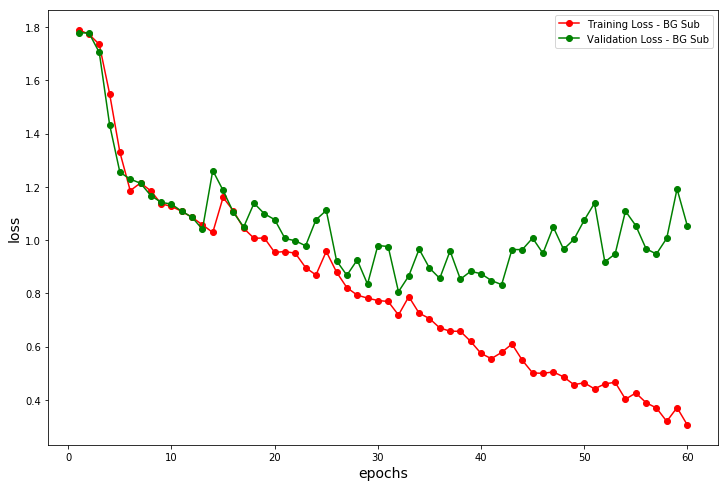

In [60]:
# Making the plot larger
plt.figure(figsize=(12, 8))

loss2_bg = history2_bg.history['loss']                          # Loss on the training data
val_loss2_bg = history2_bg.history['val_loss']                  # Loss on the validation data
epochs = range(1, 61)

plt.plot(epochs, loss2, 'ro-', label='Training Loss - BG Sub')
plt.plot(epochs, val_loss2, 'go-', label = 'Validation Loss - BG Sub')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

Normalized confusion matrix


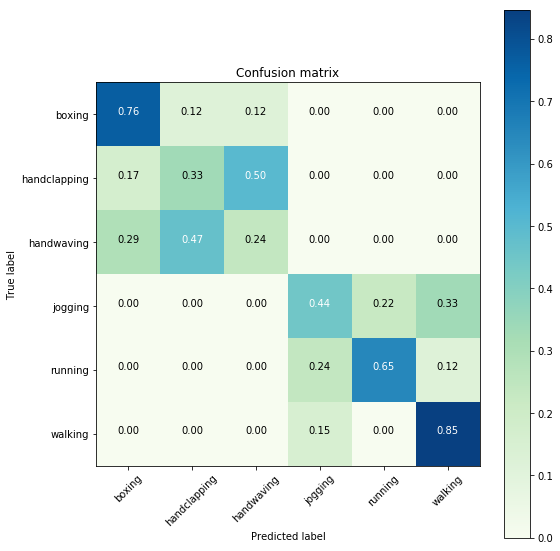

In [61]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions2_bg = model2_bg.predict_classes(X_test_bgsub);
y_pred2_bg=to_categorical(y_predictions2, num_classes=6).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);
#print y_predictions[:10]
#print y_test[:10]
model_cnf_matrix = confusion_matrix(y_test_cm,y_pred2_bg);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix, 
                                              classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'], 
                                              normalize=True)


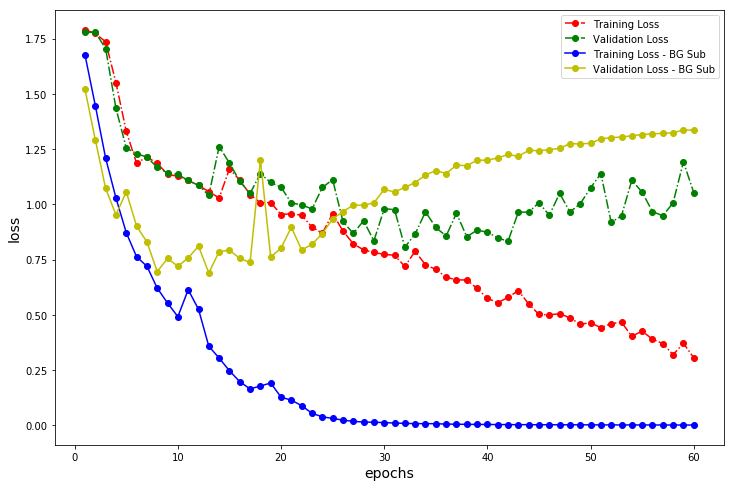

In [62]:
plt.figure(figsize=(12, 8))
plt.plot(epochs, loss2, 'ro-.', label='Training Loss')
plt.plot(epochs, val_loss2, 'go-.', label = 'Validation Loss')
plt.plot(epochs, loss2_bg, 'bo-', label='Training Loss - BG Sub')
plt.plot(epochs, val_loss2_bg, 'yo-', label = 'Validation Loss - BG Sub')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

# The model that worked

In [63]:
# from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, BatchNormalization
from keras.layers.core import Dense, Dropout

# Using the Sequential Model
model3 = Sequential()

# Adding Alternate convolutional and pooling layers
model3.add(Conv3D(filters=16, kernel_size=(5, 3, 3), strides=(1, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model3.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model3.add(Conv3D(filters=64, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model3.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model3.add(Conv3D(filters=256, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model3.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

#model.add(Conv3D(filters=1024, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
#model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

# A global average pooling layer to get a 1-d vector
# The vector will have a depth (same as number of elements in the vector) of 1024
model3.add(GlobalAveragePooling3D())

# Hidden layer
model3.add(Dense(32, activation='relu'))

# Dropout Layer
model3.add(Dropout(0.5))

# Output layer
model3.add(Dense(6, activation='softmax'))

model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_11 (Conv3D)           (None, 35, 20, 20, 16)    736       
_________________________________________________________________
max_pooling3d_11 (MaxPooling (None, 18, 10, 10, 16)    0         
_________________________________________________________________
conv3d_12 (Conv3D)           (None, 18, 10, 10, 64)    18496     
_________________________________________________________________
max_pooling3d_12 (MaxPooling (None, 9, 5, 5, 64)       0         
_________________________________________________________________
conv3d_13 (Conv3D)           (None, 9, 5, 5, 256)      295168    
_________________________________________________________________
max_pooling3d_13 (MaxPooling (None, 5, 3, 3, 256)      0         
_________________________________________________________________
global_average_pooling3d_5 ( (None, 256)               0         
__________

In [64]:
# Imports
from keras.callbacks import ModelCheckpoint

# Compiling the model
model3.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint3 = ModelCheckpoint(filepath='Model_3.weights.best.hdf5', save_best_only=True, verbose=1)


history3 = model3.fit(X_train, y_train, batch_size=15, epochs=60, 
                    validation_data=(X_valid, y_valid), verbose=2, callbacks=[checkpoint3])

Train on 300 samples, validate on 122 samples
Epoch 1/60
 - 12s - loss: 1.7958 - acc: 0.2067 - val_loss: 1.7833 - val_acc: 0.1557

Epoch 00001: val_loss improved from inf to 1.78326, saving model to Model_3.weights.best.hdf5
Epoch 2/60
 - 11s - loss: 1.7700 - acc: 0.1933 - val_loss: 1.8097 - val_acc: 0.1475

Epoch 00002: val_loss did not improve from 1.78326
Epoch 3/60
 - 11s - loss: 1.7982 - acc: 0.1800 - val_loss: 1.7810 - val_acc: 0.1885

Epoch 00003: val_loss improved from 1.78326 to 1.78096, saving model to Model_3.weights.best.hdf5
Epoch 4/60
 - 13s - loss: 1.7725 - acc: 0.2300 - val_loss: 1.7548 - val_acc: 0.2131

Epoch 00004: val_loss improved from 1.78096 to 1.75476, saving model to Model_3.weights.best.hdf5
Epoch 5/60
 - 9s - loss: 1.7145 - acc: 0.2333 - val_loss: 2.1468 - val_acc: 0.1475

Epoch 00005: val_loss did not improve from 1.75476
Epoch 6/60
 - 10s - loss: 1.7321 - acc: 0.2533 - val_loss: 1.4380 - val_acc: 0.3361

Epoch 00006: val_loss improved from 1.75476 to 1.4380

 - 9s - loss: 0.9688 - acc: 0.4267 - val_loss: 0.9060 - val_acc: 0.5820

Epoch 00052: val_loss did not improve from 0.84854
Epoch 53/60
 - 10s - loss: 0.9666 - acc: 0.4867 - val_loss: 0.9253 - val_acc: 0.4180

Epoch 00053: val_loss did not improve from 0.84854
Epoch 54/60
 - 9s - loss: 0.9344 - acc: 0.4733 - val_loss: 0.8178 - val_acc: 0.5738

Epoch 00054: val_loss improved from 0.84854 to 0.81781, saving model to Model_3.weights.best.hdf5
Epoch 55/60
 - 9s - loss: 0.9820 - acc: 0.4433 - val_loss: 0.8537 - val_acc: 0.5410

Epoch 00055: val_loss did not improve from 0.81781
Epoch 56/60
 - 10s - loss: 0.9469 - acc: 0.5033 - val_loss: 0.8921 - val_acc: 0.5820

Epoch 00056: val_loss did not improve from 0.81781
Epoch 57/60
 - 9s - loss: 0.9024 - acc: 0.5100 - val_loss: 0.7811 - val_acc: 0.6311

Epoch 00057: val_loss improved from 0.81781 to 0.78110, saving model to Model_3.weights.best.hdf5
Epoch 58/60
 - 9s - loss: 0.9038 - acc: 0.4967 - val_loss: 0.8519 - val_acc: 0.5984

Epoch 00058: va

In [65]:
# Loading the model that performed the best on the validation set
model3.load_weights('Model_3.weights.best.hdf5')

# Testing the model on the Test data
(loss3, accuracy3) = model3.evaluate(X_test, y_test, batch_size=16, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy3 * 100))

Accuracy on test data: 61.00%


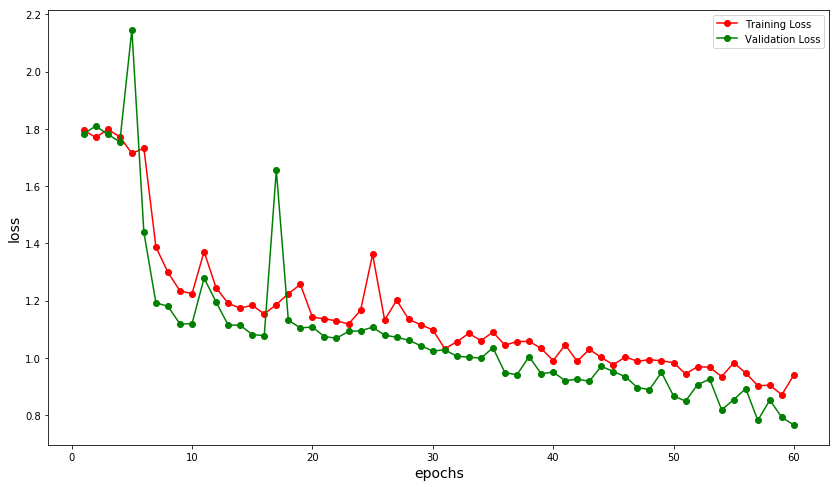

In [66]:
# Making the plot larger
plt.figure(figsize=(14, 8))

loss3 = history3.history['loss']                          # Loss on the training data
val_loss3 = history3.history['val_loss']                  # Loss on the validation data
epochs = range(1, 61)

plt.plot(epochs, loss3, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss3, 'go-', label = 'Validation Loss')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

Normalized confusion matrix


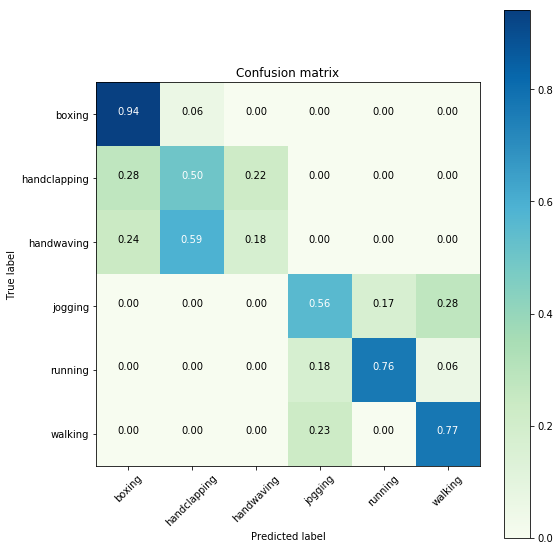

In [67]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions3 = model3.predict_classes(X_test);
y_pred3=to_categorical(y_predictions3, num_classes=6).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);

#print y_predictions3[:50]
#print y_test[:50]
model_cnf_matrix3 = confusion_matrix(y_test_cm,y_pred3);
#print(model_cnf_matrix3)
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix3, 
                                              classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'], 
                                              normalize=True)


## Model3 BG Subtraction

In [68]:
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, BatchNormalization
from keras.layers.core import Dense, Dropout

# Using the Sequential Model
model3_bg = Sequential()

# Adding Alternate convolutional and pooling layers
model3_bg.add(Conv3D(filters=16, kernel_size=(5, 5, 5), strides=(1, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model3_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model3_bg.add(Conv3D(filters=64, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model3_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model3_bg.add(Conv3D(filters=256, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model3_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

#model.add(Conv3D(filters=1024, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
#model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

# A global average pooling layer to get a 1-d vector
# The vector will have a depth (same as number of elements in the vector) of 1024
model3_bg.add(GlobalAveragePooling3D())
model3_bg.add(Dropout(0.5))
# Hidden layer
model3_bg.add(Dense(64, activation='relu'))
model3_bg.add(Dropout(0.5))
model3_bg.add(Dense(32, activation='relu'))

# Dropout Layer
model3_bg.add(Dropout(0.5))

# Output layer
model3_bg.add(Dense(6, activation='softmax'))

model3_bg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_14 (Conv3D)           (None, 35, 20, 20, 16)    2016      
_________________________________________________________________
max_pooling3d_14 (MaxPooling (None, 18, 10, 10, 16)    0         
_________________________________________________________________
conv3d_15 (Conv3D)           (None, 18, 10, 10, 64)    27712     
_________________________________________________________________
max_pooling3d_15 (MaxPooling (None, 9, 5, 5, 64)       0         
_________________________________________________________________
conv3d_16 (Conv3D)           (None, 9, 5, 5, 256)      442624    
_________________________________________________________________
max_pooling3d_16 (MaxPooling (None, 5, 3, 3, 256)      0         
_________________________________________________________________
global_average_pooling3d_6 ( (None, 256)               0         
__________

In [69]:
##### Imports
from keras.callbacks import ModelCheckpoint

# Compiling the model
model3_bg.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint3_bg = ModelCheckpoint(filepath='Model_3_bg.weights.best.hdf5', save_best_only=True, verbose=1)


history3_bg = model3_bg.fit(X_train_bgsub, y_train_bgsub, batch_size=15, epochs=60, 
                    validation_data=(X_valid_bgsub, y_valid_bgsub), verbose=1, callbacks=[checkpoint3_bg])

Train on 300 samples, validate on 122 samples
Epoch 1/60
300/300 [==============================] - 13s 44ms/step - loss: 1.7557 - acc: 0.1867 - val_loss: 1.6525 - val_acc: 0.1475

Epoch 00001: val_loss improved from inf to 1.65245, saving model to Model_3_bg.weights.best.hdf5
Epoch 2/60
300/300 [==============================] - 13s 42ms/step - loss: 1.6076 - acc: 0.2533 - val_loss: 1.5085 - val_acc: 0.1803

Epoch 00002: val_loss improved from 1.65245 to 1.50855, saving model to Model_3_bg.weights.best.hdf5
Epoch 3/60
300/300 [==============================] - 12s 41ms/step - loss: 1.5728 - acc: 0.2933 - val_loss: 1.4980 - val_acc: 0.3279

Epoch 00003: val_loss improved from 1.50855 to 1.49800, saving model to Model_3_bg.weights.best.hdf5
Epoch 4/60
300/300 [==============================] - 13s 42ms/step - loss: 1.4904 - acc: 0.3500 - val_loss: 1.4753 - val_acc: 0.2951

Epoch 00004: val_loss improved from 1.49800 to 1.47525, saving model to Model_3_bg.weights.best.hdf5
Epoch 5/60
300

300/300 [==============================] - 15s 49ms/step - loss: 0.5230 - acc: 0.7133 - val_loss: 0.7385 - val_acc: 0.6639

Epoch 00039: val_loss did not improve from 0.63055
Epoch 40/60
300/300 [==============================] - 15s 50ms/step - loss: 0.5127 - acc: 0.6867 - val_loss: 0.7074 - val_acc: 0.6721

Epoch 00040: val_loss did not improve from 0.63055
Epoch 41/60
300/300 [==============================] - 14s 46ms/step - loss: 0.5128 - acc: 0.7167 - val_loss: 0.7060 - val_acc: 0.6721

Epoch 00041: val_loss did not improve from 0.63055
Epoch 42/60
300/300 [==============================] - 12s 41ms/step - loss: 0.5183 - acc: 0.7367 - val_loss: 0.7150 - val_acc: 0.6639

Epoch 00042: val_loss did not improve from 0.63055
Epoch 43/60
300/300 [==============================] - 12s 40ms/step - loss: 0.4691 - acc: 0.7300 - val_loss: 0.6983 - val_acc: 0.6967

Epoch 00043: val_loss did not improve from 0.63055
Epoch 44/60
300/300 [==============================] - 16s 54ms/step - loss: 

In [70]:
# Loading the model that performed the best on the validation set
model3_bg.load_weights('Model_3_bg.weights.best.hdf5')

# Testing the model on the Test data
(loss3_bg, accuracy3_bg) = model3_bg.evaluate(X_test_bgsub, y_test_bgsub, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy3_bg * 100))

Accuracy on test data: 64.00%


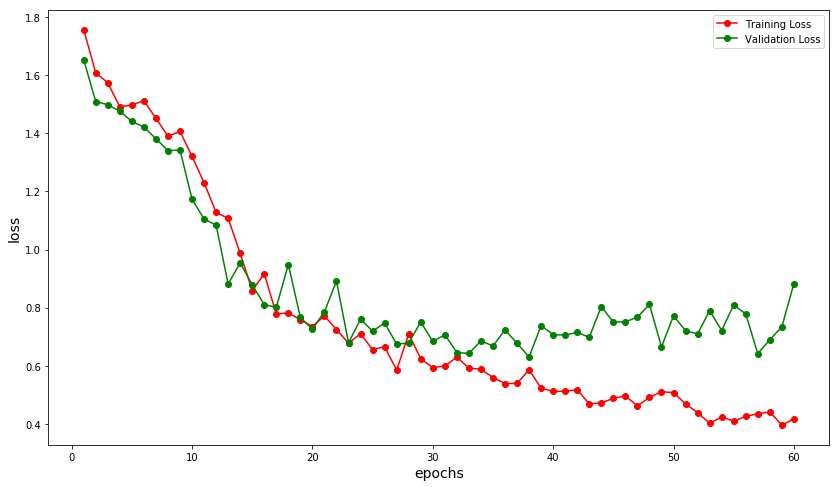

In [71]:
# Making the plot larger
plt.figure(figsize=(14, 8))

loss3_bg = history3_bg.history['loss']                          # Loss on the training data
val_loss3_bg = history3_bg.history['val_loss']                  # Loss on the validation data
epochs = range(1, 61)

plt.plot(epochs, loss3_bg, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss3_bg, 'go-', label = 'Validation Loss')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

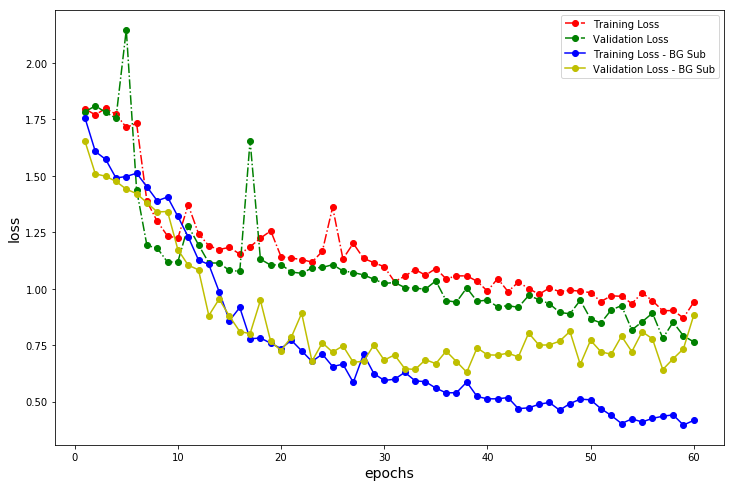

In [72]:
plt.figure(figsize=(12, 8))
plt.plot(epochs, loss3, 'ro-.', label='Training Loss')
plt.plot(epochs, val_loss3, 'go-.', label = 'Validation Loss')
plt.plot(epochs, loss3_bg, 'bo-', label='Training Loss - BG Sub')
plt.plot(epochs, val_loss3_bg, 'yo-', label = 'Validation Loss - BG Sub')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

Normalized confusion matrix


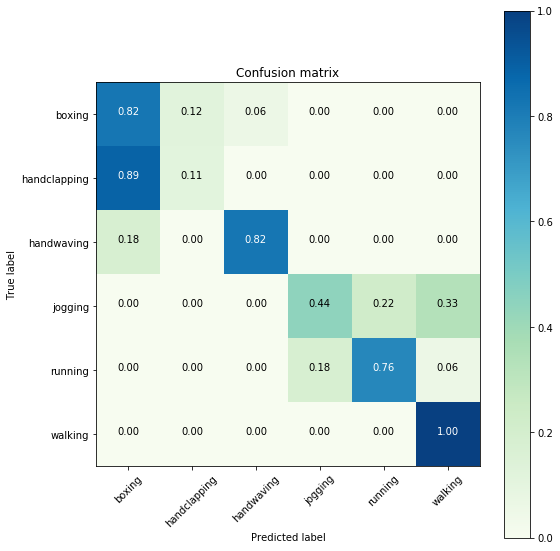

In [73]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions3_bg = model3_bg.predict_classes(X_test_bgsub);
y_pred3_bg=to_categorical(y_predictions3_bg, num_classes=6).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);
#print y_predictions[:50]
#print y_test[:50]
model_cnf_matrix3_bg = confusion_matrix(y_test_cm,y_pred3_bg);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix3_bg, 
                                              classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'], 
                                              normalize=True)


# The model with more dropouts

In [74]:
# from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, BatchNormalization
from keras.layers.core import Dense, Dropout

# Using the Sequential Model
model10 = Sequential()

# Adding Alternate convolutional and pooling layers
model10.add(Conv3D(filters=16, kernel_size=(5, 3, 3), strides=(1, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model10.add(Dropout(0.3))
model10.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model10.add(Conv3D(filters=64, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model10.add(Dropout(0.3))
model10.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model10.add(Conv3D(filters=256, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model10.add(Dropout(0.5))
model10.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

#model.add(Conv3D(filters=1024, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
#model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

# A global average pooling layer to get a 1-d vector
# The vector will have a depth (same as number of elements in the vector) of 1024
model10.add(GlobalAveragePooling3D())

# Hidden layer
model10.add(Dense(32, activation='relu'))

# Dropout Layer
model10.add(Dropout(0.5))

# Output layer
model10.add(Dense(6, activation='softmax'))

model10.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_17 (Conv3D)           (None, 35, 20, 20, 16)    736       
_________________________________________________________________
dropout_5 (Dropout)          (None, 35, 20, 20, 16)    0         
_________________________________________________________________
max_pooling3d_17 (MaxPooling (None, 18, 10, 10, 16)    0         
_________________________________________________________________
conv3d_18 (Conv3D)           (None, 18, 10, 10, 64)    18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 18, 10, 10, 64)    0         
_________________________________________________________________
max_pooling3d_18 (MaxPooling (None, 9, 5, 5, 64)       0         
_________________________________________________________________
conv3d_19 (Conv3D)           (None, 9, 5, 5, 256)      295168    
__________

In [75]:
# Imports
from keras.callbacks import ModelCheckpoint

# Compiling the model
model10.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint10 = ModelCheckpoint(filepath='Model_10.weights.best.hdf5', save_best_only=True, verbose=1)


history10 = model10.fit(X_train, y_train, batch_size=1, epochs=100, 
                    validation_data=(X_valid, y_valid), verbose=2, callbacks=[checkpoint10])

Train on 300 samples, validate on 122 samples
Epoch 1/100
 - 29s - loss: 2.0107 - acc: 0.2100 - val_loss: 1.7827 - val_acc: 0.2213

Epoch 00001: val_loss improved from inf to 1.78273, saving model to Model_10.weights.best.hdf5
Epoch 2/100
 - 17s - loss: 1.7814 - acc: 0.2267 - val_loss: 1.7861 - val_acc: 0.1475

Epoch 00002: val_loss did not improve from 1.78273
Epoch 3/100
 - 20s - loss: 1.7848 - acc: 0.1967 - val_loss: 1.7856 - val_acc: 0.1475

Epoch 00003: val_loss did not improve from 1.78273
Epoch 4/100
 - 30s - loss: 1.7705 - acc: 0.1967 - val_loss: 1.7911 - val_acc: 0.1475

Epoch 00004: val_loss did not improve from 1.78273
Epoch 5/100
 - 25s - loss: 1.7952 - acc: 0.1833 - val_loss: 1.7806 - val_acc: 0.2213

Epoch 00005: val_loss improved from 1.78273 to 1.78056, saving model to Model_10.weights.best.hdf5
Epoch 6/100
 - 19s - loss: 1.7751 - acc: 0.2167 - val_loss: 1.7841 - val_acc: 0.1475

Epoch 00006: val_loss did not improve from 1.78056
Epoch 7/100
 - 27s - loss: 1.7741 - acc:


Epoch 00059: val_loss did not improve from 1.78056
Epoch 60/100
 - 17s - loss: 1.7711 - acc: 0.2133 - val_loss: 1.7874 - val_acc: 0.1475

Epoch 00060: val_loss did not improve from 1.78056
Epoch 61/100
 - 16s - loss: 1.7709 - acc: 0.2133 - val_loss: 1.7866 - val_acc: 0.1475

Epoch 00061: val_loss did not improve from 1.78056
Epoch 62/100
 - 16s - loss: 1.7709 - acc: 0.2133 - val_loss: 1.7866 - val_acc: 0.1475

Epoch 00062: val_loss did not improve from 1.78056
Epoch 63/100
 - 16s - loss: 1.7711 - acc: 0.2133 - val_loss: 1.7868 - val_acc: 0.1475

Epoch 00063: val_loss did not improve from 1.78056
Epoch 64/100
 - 16s - loss: 1.7706 - acc: 0.2133 - val_loss: 1.7865 - val_acc: 0.1475

Epoch 00064: val_loss did not improve from 1.78056
Epoch 65/100
 - 16s - loss: 1.7708 - acc: 0.2133 - val_loss: 1.7862 - val_acc: 0.1475

Epoch 00065: val_loss did not improve from 1.78056
Epoch 66/100
 - 16s - loss: 1.7709 - acc: 0.2133 - val_loss: 1.7867 - val_acc: 0.1475

Epoch 00066: val_loss did not imp

In [76]:
# Loading the model that performed the best on the validation set
model10.load_weights('Model_10.weights.best.hdf5')

# Testing the model on the Test data
(loss10, accuracy10) = model3.evaluate(X_test, y_test, batch_size=1, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy10 * 100))

Accuracy on test data: 61.00%


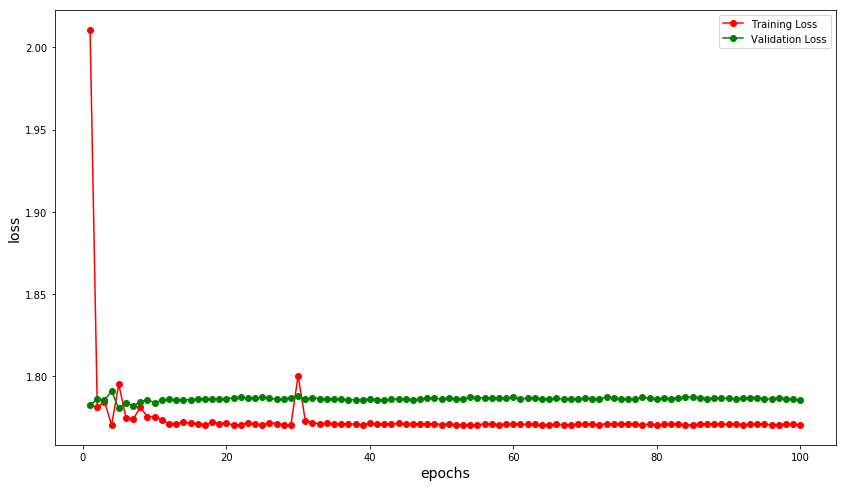

In [77]:
# Making the plot larger
plt.figure(figsize=(14, 8))

loss10 = history10.history['loss']                          # Loss on the training data
val_loss10 = history10.history['val_loss']                  # Loss on the validation data
epochs = range(1, 101)

plt.plot(epochs, loss10, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss10, 'go-', label = 'Validation Loss')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

Normalized confusion matrix


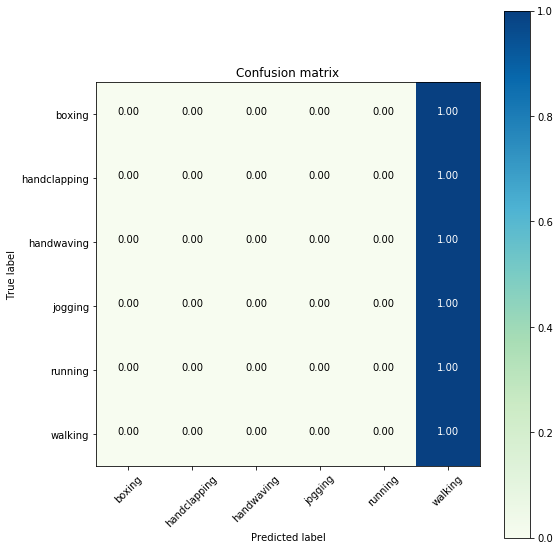

In [78]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions10 = model10.predict_classes(X_test);
y_pred10=to_categorical(y_predictions10, num_classes=6).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);

#print y_predictions3[:50]
#print y_test[:50]
model_cnf_matrix10 = confusion_matrix(y_test_cm,y_pred10);
#print(model_cnf_matrix3)
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix10, 
                                              classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'], 
                                              normalize=True)


## Model BG Subtraction more dropouts

In [79]:
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, BatchNormalization
from keras.layers.core import Dense, Dropout

# Using the Sequential Model
model10_bg = Sequential()

# Adding Alternate convolutional and pooling layers
model10_bg.add(Conv3D(filters=16, kernel_size=(5, 5, 5), strides=(1, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model10_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model10_bg.add(Dropout(0.5))
model10_bg.add(Conv3D(filters=64, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model10_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))
model10_bg.add(Dropout(0.5))

model10_bg.add(Conv3D(filters=256, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
#model10_bg.add(Dropout(0.5))
model10_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))
model10_bg.add(Dropout(0.5))
#model.add(Conv3D(filters=1024, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
#model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

# A global average pooling layer to get a 1-d vector
# The vector will have a depth (same as number of elements in the vector) of 1024
model10_bg.add(GlobalAveragePooling3D())

# Hidden layer
model10_bg.add(Dropout(0.5))
model10_bg.add(Dense(32, activation='relu'))

# Dropout Layer
model10_bg.add(Dropout(0.5))

# Output layer
model10_bg.add(Dense(6, activation='softmax'))

model10_bg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_20 (Conv3D)           (None, 35, 20, 20, 16)    2016      
_________________________________________________________________
max_pooling3d_20 (MaxPooling (None, 18, 10, 10, 16)    0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 18, 10, 10, 16)    0         
_________________________________________________________________
conv3d_21 (Conv3D)           (None, 18, 10, 10, 64)    27712     
_________________________________________________________________
max_pooling3d_21 (MaxPooling (None, 9, 5, 5, 64)       0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 9, 5, 5, 64)       0         
_________________________________________________________________
conv3d_22 (Conv3D)           (None, 9, 5, 5, 256)      442624    
__________

In [80]:
##### Imports
from keras.callbacks import ModelCheckpoint

# Compiling the model
model10_bg.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint10_bg = ModelCheckpoint(filepath='Model_10_bg.weights.best.hdf5', save_best_only=True, verbose=1)


history10_bg = model10_bg.fit(X_train_bgsub, y_train_bgsub, batch_size=10, epochs=150, 
                    validation_data=(X_valid_bgsub, y_valid_bgsub), verbose=1, callbacks=[checkpoint10_bg])

Train on 300 samples, validate on 122 samples
Epoch 1/150
300/300 [==============================] - 15s 49ms/step - loss: 1.7680 - acc: 0.2133 - val_loss: 1.6880 - val_acc: 0.1475

Epoch 00001: val_loss improved from inf to 1.68796, saving model to Model_10_bg.weights.best.hdf5
Epoch 2/150
300/300 [==============================] - 13s 44ms/step - loss: 1.6230 - acc: 0.2400 - val_loss: 1.5671 - val_acc: 0.2541

Epoch 00002: val_loss improved from 1.68796 to 1.56711, saving model to Model_10_bg.weights.best.hdf5
Epoch 3/150
300/300 [==============================] - 13s 44ms/step - loss: 1.5161 - acc: 0.3033 - val_loss: 1.4901 - val_acc: 0.2951

Epoch 00003: val_loss improved from 1.56711 to 1.49006, saving model to Model_10_bg.weights.best.hdf5
Epoch 4/150
300/300 [==============================] - 13s 45ms/step - loss: 1.4552 - acc: 0.3200 - val_loss: 1.4502 - val_acc: 0.3115

Epoch 00004: val_loss improved from 1.49006 to 1.45016, saving model to Model_10_bg.weights.best.hdf5
Epoch 

300/300 [==============================] - 13s 44ms/step - loss: 0.4176 - acc: 0.8267 - val_loss: 0.7140 - val_acc: 0.7295

Epoch 00038: val_loss did not improve from 0.48638
Epoch 39/150
300/300 [==============================] - 14s 45ms/step - loss: 0.4308 - acc: 0.8200 - val_loss: 0.5170 - val_acc: 0.7869

Epoch 00039: val_loss did not improve from 0.48638
Epoch 40/150
300/300 [==============================] - 13s 45ms/step - loss: 0.4296 - acc: 0.8367 - val_loss: 0.4978 - val_acc: 0.7951

Epoch 00040: val_loss did not improve from 0.48638
Epoch 41/150
300/300 [==============================] - 13s 45ms/step - loss: 0.3510 - acc: 0.8400 - val_loss: 0.5733 - val_acc: 0.7377

Epoch 00041: val_loss did not improve from 0.48638
Epoch 42/150
300/300 [==============================] - 13s 44ms/step - loss: 0.4377 - acc: 0.8500 - val_loss: 0.4459 - val_acc: 0.8197

Epoch 00042: val_loss improved from 0.48638 to 0.44589, saving model to Model_10_bg.weights.best.hdf5
Epoch 43/150
300/300 [


Epoch 00080: val_loss did not improve from 0.39430
Epoch 81/150
300/300 [==============================] - 14s 45ms/step - loss: 0.1586 - acc: 0.9500 - val_loss: 0.4812 - val_acc: 0.8607

Epoch 00081: val_loss did not improve from 0.39430
Epoch 82/150
300/300 [==============================] - 13s 45ms/step - loss: 0.1433 - acc: 0.9467 - val_loss: 0.6354 - val_acc: 0.8197

Epoch 00082: val_loss did not improve from 0.39430
Epoch 83/150
300/300 [==============================] - 13s 44ms/step - loss: 0.2012 - acc: 0.9167 - val_loss: 0.4501 - val_acc: 0.8361

Epoch 00083: val_loss did not improve from 0.39430
Epoch 84/150
300/300 [==============================] - 13s 44ms/step - loss: 0.2206 - acc: 0.9267 - val_loss: 0.4686 - val_acc: 0.8361

Epoch 00084: val_loss did not improve from 0.39430
Epoch 85/150
300/300 [==============================] - 14s 45ms/step - loss: 0.1598 - acc: 0.9400 - val_loss: 0.4852 - val_acc: 0.8197

Epoch 00085: val_loss did not improve from 0.39430
Epoch 86

300/300 [==============================] - 13s 44ms/step - loss: 0.1551 - acc: 0.9400 - val_loss: 0.5507 - val_acc: 0.8689

Epoch 00123: val_loss did not improve from 0.35958
Epoch 124/150
300/300 [==============================] - 13s 44ms/step - loss: 0.1877 - acc: 0.9333 - val_loss: 0.6268 - val_acc: 0.8443

Epoch 00124: val_loss did not improve from 0.35958
Epoch 125/150
300/300 [==============================] - 13s 44ms/step - loss: 0.1330 - acc: 0.9400 - val_loss: 0.5488 - val_acc: 0.8525

Epoch 00125: val_loss did not improve from 0.35958
Epoch 126/150
300/300 [==============================] - 13s 43ms/step - loss: 0.1740 - acc: 0.9500 - val_loss: 0.5955 - val_acc: 0.8361

Epoch 00126: val_loss did not improve from 0.35958
Epoch 127/150
300/300 [==============================] - 13s 44ms/step - loss: 0.1483 - acc: 0.9467 - val_loss: 0.4682 - val_acc: 0.8279

Epoch 00127: val_loss did not improve from 0.35958
Epoch 128/150
300/300 [==============================] - 13s 44ms/ste

In [81]:
# Loading the model that performed the best on the validation set
model10_bg.load_weights('Model_10_bg.weights.best.hdf5')

# Testing the model on the Test data
(loss10_bg, accuracy10_bg) = model10_bg.evaluate(X_test_bgsub, y_test_bgsub, batch_size=1, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy10_bg * 100))

Accuracy on test data: 84.00%


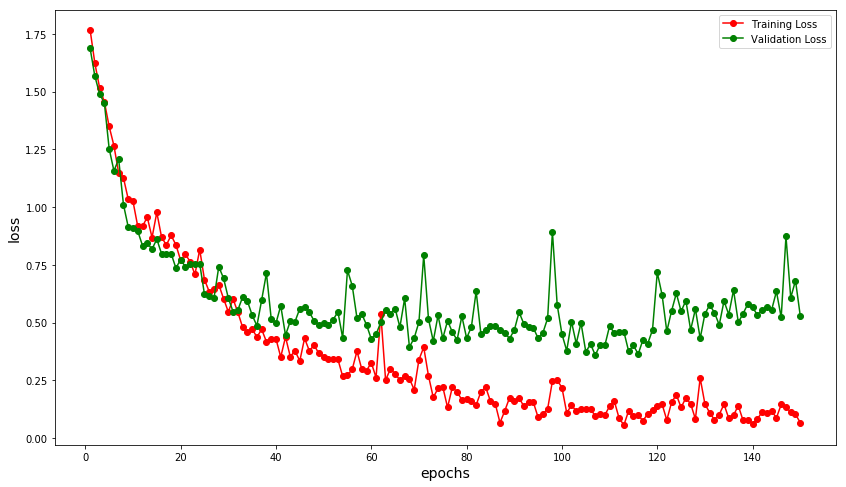

In [82]:
# Making the plot larger
plt.figure(figsize=(14, 8))

loss10_bg = history10_bg.history['loss']                          # Loss on the training data
val_loss10_bg = history10_bg.history['val_loss']                  # Loss on the validation data
epochs = range(1, 151)

plt.plot(epochs, loss10_bg, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss10_bg, 'go-', label = 'Validation Loss')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

ValueError: x and y must have same first dimension, but have shapes (150,) and (100,)

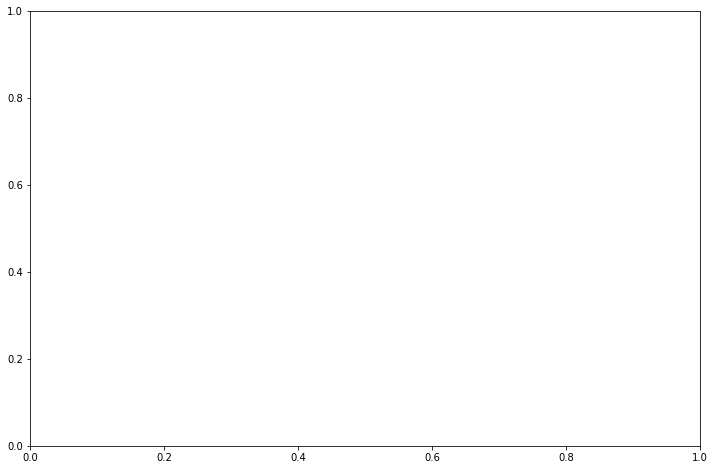

In [83]:
plt.figure(figsize=(12, 8))
plt.plot(epochs, loss10, 'ro-.', label='Training Loss')
plt.plot(epochs, val_loss10, 'go-.', label = 'Validation Loss')
plt.plot(epochs, loss10_bg, 'bo-', label='Training Loss - BG Sub')
plt.plot(epochs, val_loss10_bg, 'yo-', label = 'Validation Loss - BG Sub')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

Normalized confusion matrix


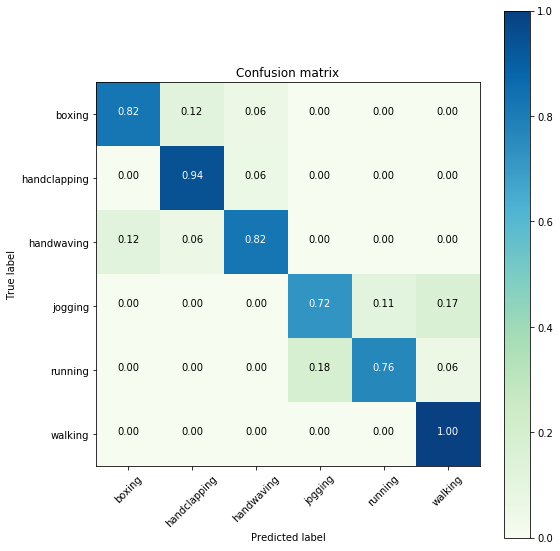

In [84]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions10_bg = model10_bg.predict_classes(X_test_bgsub);
y_pred10_bg=to_categorical(y_predictions10_bg, num_classes=6).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);
#print y_predictions[:50]
#print y_test[:50]
model_cnf_matrix10_bg = confusion_matrix(y_test_cm,y_pred10_bg);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix10_bg, 
                                              classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'], 
                                              normalize=True)


## Model with Varying Dropouts

In [ ]:
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, BatchNormalization
from keras.layers.core import Dense, Dropout

# Using the Sequential Model
model4_bg = Sequential()

# Adding Alternate convolutional and pooling layers
model4_bg.add(Conv3D(filters=16, kernel_size=(5, 3, 3), strides=(1, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model4_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model4_bg.add(Conv3D(filters=64, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model4_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model4_bg.add(Conv3D(filters=256, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model4_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

#model.add(Conv3D(filters=1024, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
#model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

# A global average pooling layer to get a 1-d vector
# The vector will have a depth (same as number of elements in the vector) of 1024
model4_bg.add(GlobalAveragePooling3D())

# Hidden layer
model4_bg.add(Dense(32, activation='relu'))

# Dropout Layer
model4_bg.add(Dropout(0.3))

# Output layer
model4_bg.add(Dense(6, activation='softmax'))

model4_bg.summary()

In [ ]:
##### Imports
from keras.callbacks import ModelCheckpoint

# Compiling the model
model4_bg.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint4_bg = ModelCheckpoint(filepath='Model_4_bg.weights.best.hdf5', save_best_only=True, verbose=1)


history4_bg = model4_bg.fit(X_train_bgsub, y_train_bgsub, batch_size=15, epochs=60, 
                    validation_data=(X_valid_bgsub, y_valid_bgsub), verbose=1, callbacks=[checkpoint4_bg])

In [ ]:
# Loading the model that performed the best on the validation set
model4_bg.load_weights('Model_4_bg.weights.best.hdf5')

# Testing the model on the Test data
(loss4_bg, accuracy4_bg) = model4_bg.evaluate(X_test_bgsub, y_test_bgsub, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy4_bg * 100))

In [ ]:
# Making the plot larger
plt.figure(figsize=(14, 8))

loss4_bg = history4_bg.history['loss']                          # Loss on the training data
val_loss4_bg = history4_bg.history['val_loss']                  # Loss on the validation data
epochs = range(1, 61)

plt.plot(epochs, loss4_bg, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss4_bg, 'go-', label = 'Validation Loss')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(epochs, loss4_bg, 'ro-.', label='Training Loss -0.3')
plt.plot(epochs, val_loss4_bg, 'go-.', label = 'Validation Loss -0.3')
plt.plot(epochs, loss3_bg, 'bo-', label='Training Loss - 0.5')
plt.plot(epochs, val_loss3_bg, 'yo-', label = 'Validation Loss - 0.5')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions4_bg = model4_bg.predict_classes(X_test_bgsub);
y_pred4_bg=to_categorical(y_predictions4_bg, num_classes=6).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);
#print y_predictions[:50]
#print y_test[:50]
model_cnf_matrix4_bg = confusion_matrix(y_test_cm,y_pred4_bg);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix4_bg, 
                                              classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'], 
                                              normalize=True)


## 0.7 Dropout

In [ ]:
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, BatchNormalization
from keras.layers.core import Dense, Dropout

# Using the Sequential Model
model5_bg = Sequential()

# Adding Alternate convolutional and pooling layers
model5_bg.add(Conv3D(filters=16, kernel_size=(5, 3, 3), strides=(1, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model5_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model5_bg.add(Conv3D(filters=64, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model5_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model5_bg.add(Conv3D(filters=256, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model5_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

#model.add(Conv3D(filters=1024, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
#model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

# A global average pooling layer to get a 1-d vector
# The vector will have a depth (same as number of elements in the vector) of 1024
model5_bg.add(GlobalAveragePooling3D())

# Hidden layer
model5_bg.add(Dense(32, activation='relu'))

# Dropout Layer
model5_bg.add(Dropout(0.7))

# Output layer
model5_bg.add(Dense(6, activation='softmax'))

model5_bg.summary()

In [ ]:
##### Imports
from keras.callbacks import ModelCheckpoint

# Compiling the model
model5_bg.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint5_bg = ModelCheckpoint(filepath='Model_5_bg.weights.best.hdf5', save_best_only=True, verbose=1)


history5_bg = model5_bg.fit(X_train_bgsub, y_train_bgsub, batch_size=15, epochs=60, 
                    validation_data=(X_valid_bgsub, y_valid_bgsub), verbose=1, callbacks=[checkpoint5_bg])

In [ ]:
# Loading the model that performed the best on the validation set
model5_bg.load_weights('Model_5_bg.weights.best.hdf5')

# Testing the model on the Test data
(loss5_bg, accuracy5_bg) = model5_bg.evaluate(X_test_bgsub, y_test_bgsub, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy5_bg * 100))

In [ ]:
# Making the plot larger
plt.figure(figsize=(14, 8))

loss5_bg = history5_bg.history['loss']                          # Loss on the training data
val_loss5_bg = history5_bg.history['val_loss']                  # Loss on the validation data
epochs = range(1, 61)

plt.plot(epochs, loss5_bg, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss5_bg, 'go-', label = 'Validation Loss')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

In [ ]:
plt.figure(figsize=(12, 8))

plt.plot(epochs, loss4_bg, 'ro-.', label='Training Loss -0.3')
plt.plot(epochs, val_loss4_bg, 'go-.', label = 'Validation Loss -0.3')

plt.plot(epochs, loss3_bg, 'bo-', label='Training Loss - 0.5')
plt.plot(epochs, val_loss3_bg, 'yo-', label = 'Validation Loss - 0.5')

plt.plot(epochs, loss5_bg, 'b^--',color="black", label='Training Loss - 0.7')
plt.plot(epochs, val_loss5_bg, 'b^--',color="purple", label = 'Validation Loss - 0.7')

plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions4_bg = model5_bg.predict_classes(X_test_bgsub);
y_pred4_bg=to_categorical(y_predictions4_bg, num_classes=6).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);
#print y_predictions[:50]
#print y_test[:50]
model_cnf_matrix4_bg = confusion_matrix(y_test_cm,y_pred4_bg);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix4_bg, 
                                              classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'], 
                                              normalize=True)


## Different Input dimensions on model3

In [ ]:
X_train_bgsub_2 = read_videos_bgsub(train_files,40)
y_train_bgsub_2 = to_categorical(train_targets, num_classes=6)
print('Shape of training data:', X_train_bgsub_2.shape)
print('Shape of training labels:', y_train_bgsub_2.shape)

In [ ]:
X_test_bgsub_2 = read_videos_bgsub(test_files,40)
y_test_bgsub_2 = to_categorical(test_targets, num_classes=6)
print('Shape of testing data:', X_test_bgsub_2.shape)
print('Shape of testing labels:', y_test_bgsub_2.shape)

In [ ]:
X_valid_bgsub_2 = read_videos_bgsub(valid_files,40)
y_valid_bgsub_2 = to_categorical(valid_targets, num_classes=6)
print('Shape of validation data:', X_valid_bgsub_2.shape)
print('Shape of validation labels:', y_valid_bgsub_2.shape)

In [ ]:
X_train_bgsub_3 = read_videos_bgsub(train_files,60)
y_train_bgsub_3 = to_categorical(train_targets, num_classes=6)
print('Shape of training data:', X_train_bgsub_3.shape)
print('Shape of training labels:', y_train_bgsub_3.shape)

In [ ]:
X_test_bgsub_3 = read_videos_bgsub(test_files,60)
y_test_bgsub_3 = to_categorical(test_targets, num_classes=6)
print('Shape of testing data:', X_test_bgsub_3.shape)
print('Shape of testing labels:', y_test_bgsub_3.shape)

In [ ]:
X_valid_bgsub_3 = read_videos_bgsub(valid_files,60)
y_valid_bgsub_3 = to_categorical(valid_targets, num_classes=6)
print('Shape of validation data:', X_valid_bgsub_3.shape)
print('Shape of validation labels:', y_valid_bgsub_3.shape)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, BatchNormalization
from keras.layers.core import Dense, Dropout

# Using the Sequential Model
model3_bg2 = Sequential()

# Adding Alternate convolutional and pooling layers
model3_bg2.add(Conv3D(filters=16, kernel_size=(5, 3, 3), strides=(1, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train_bgsub_2.shape[1:]))
model3_bg2.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model3_bg2.add(Conv3D(filters=64, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model3_bg2.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model3_bg2.add(Conv3D(filters=256, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model3_bg2.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

#model.add(Conv3D(filters=1024, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
#model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

# A global average pooling layer to get a 1-d vector
# The vector will have a depth (same as number of elements in the vector) of 1024
model3_bg2.add(GlobalAveragePooling3D())

# Hidden layer
model3_bg2.add(Dense(32, activation='relu'))

# Dropout Layer
model3_bg2.add(Dropout(0.5))

# Output layer
model3_bg2.add(Dense(6, activation='softmax'))

model3_bg2.summary()

In [ ]:
##### Imports
from keras.callbacks import ModelCheckpoint

# Compiling the model
model3_bg2.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint3_bg2 = ModelCheckpoint(filepath='Model_3_bg2.weights.best.hdf5', save_best_only=True, verbose=1)


history3_bg2 = model3_bg2.fit(X_train_bgsub_2, y_train_bgsub_2, batch_size=15, epochs=60, 
                    validation_data=(X_valid_bgsub_2, y_valid_bgsub_2), verbose=1, callbacks=[checkpoint3_bg2])

In [ ]:
# Loading the model that performed the best on the validation set
model3_bg2.load_weights('Model_3_bg2.weights.best.hdf5')

# Testing the model on the Test data
(loss3_bg2, accuracy3_bg2) = model3_bg2.evaluate(X_test_bgsub_2, y_test_bgsub_2, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy3_bg2 * 100))

In [ ]:
# Making the plot larger
plt.figure(figsize=(14, 8))

loss3_bg2 = history3_bg2.history['loss']                          # Loss on the training data
val_loss3_bg2 = history3_bg2.history['val_loss']                  # Loss on the validation data
epochs = range(1, 61)

plt.plot(epochs, loss3_bg2, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss3_bg2, 'go-', label = 'Validation Loss')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(epochs, loss3_bg2, 'ro-.', label='Training Loss - 40*40')
plt.plot(epochs, val_loss3_bg2, 'go-.', label = 'Validation Loss - 40*40')
plt.plot(epochs, loss3_bg, 'bo-', label='Training Loss - 20*20')
plt.plot(epochs, val_loss3_bg, 'yo-', label = 'Validation Loss - 20*20')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions3_bg2 = model3_bg2.predict_classes(X_test_bgsub_2);
y_pred3_bg2=to_categorical(y_predictions3_bg2, num_classes=6).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);
#print y_predictions[:50]
#print y_test[:50]
model_cnf_matrix3_bg2 = confusion_matrix(y_test_cm,y_pred3_bg2);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix3_bg2, 
                                              classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'], 
                                              normalize=True)


## 60*60

In [ ]:
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, BatchNormalization
from keras.layers.core import Dense, Dropout

# Using the Sequential Model
model3_bg3 = Sequential()

# Adding Alternate convolutional and pooling layers
model3_bg3.add(Conv3D(filters=16, kernel_size=(5, 3, 3), strides=(1, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train_bgsub_3.shape[1:]))
model3_bg3.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model3_bg3.add(Conv3D(filters=64, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model3_bg3.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model3_bg3.add(Conv3D(filters=256, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model3_bg3.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

#model.add(Conv3D(filters=1024, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
#model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

# A global average pooling layer to get a 1-d vector
# The vector will have a depth (same as number of elements in the vector) of 1024
model3_bg3.add(GlobalAveragePooling3D())

# Hidden layer
model3_bg3.add(Dense(32, activation='relu'))

# Dropout Layer
model3_bg3.add(Dropout(0.5))

# Output layer
model3_bg3.add(Dense(6, activation='softmax'))

model3_bg3.summary()

In [ ]:
##### Imports
from keras.callbacks import ModelCheckpoint

# Compiling the model
model3_bg3.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint3_bg3 = ModelCheckpoint(filepath='Model_3_bg3.weights.best.hdf5', save_best_only=True, verbose=1)


history3_bg3 = model3_bg3.fit(X_train_bgsub_3, y_train_bgsub_3, batch_size=15, epochs=60, 
                    validation_data=(X_valid_bgsub_3, y_valid_bgsub_3), verbose=1, callbacks=[checkpoint3_bg3])

In [ ]:
# Loading the model that performed the best on the validation set
model3_bg3.load_weights('Model_3_bg3.weights.best.hdf5')

# Testing the model on the Test data
(loss3_bg3, accuracy3_bg3) = model3_bg3.evaluate(X_test_bgsub_3, y_test_bgsub_3, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy3_bg3 * 100))

In [ ]:
# Making the plot larger
plt.figure(figsize=(14, 8))

loss3_bg3 = history3_bg3.history['loss']                          # Loss on the training data
val_loss3_bg3 = history3_bg3.history['val_loss']                  # Loss on the validation data
epochs = range(1, 61)

plt.plot(epochs, loss3_bg3, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss3_bg3, 'go-', label = 'Validation Loss')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(epochs, loss3_bg3, 'ro-.', label='Training Loss - 60*60')
plt.plot(epochs, val_loss3_bg3, 'go-.', label = 'Validation Loss - 60*60')
plt.plot(epochs, loss3_bg2, 'ro-.',color="black", label='Training Loss - 40*40')
plt.plot(epochs, val_loss3_bg2, 'go-.',color="purple", label = 'Validation Loss - 40*40')
plt.plot(epochs, loss3_bg, 'bo-', label='Training Loss - 20*20')
plt.plot(epochs, val_loss3_bg, 'yo-', label = 'Validation Loss - 20*20')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions3_bg3 = model3_bg3.predict_classes(X_test_bgsub_3);
y_pred3_bg3=to_categorical(y_predictions3_bg3, num_classes=6).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);
#print y_predictions[:50]
#print y_test[:50]
model_cnf_matrix3_bg = confusion_matrix(y_test_cm,y_pred3_bg3);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix3_bg, 
                                              classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'], 
                                              normalize=True)
